# Single Layer RNN

In [7]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfdf
tf.__version__

'2.2.0'

In [8]:
dataset,info = tfdf.load('imdb_reviews/subwords8k',with_info=True,as_supervised=True)

In [9]:
train_dataset, test_dataset = dataset['train'],dataset['test']

In [10]:
tokenizer = info.features['text'].encoder

In [11]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [15]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=tokenizer.vocab_size,output_dim=64),
    tf.keras.layers.SimpleRNN(64),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dense(units=1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 64)                8256      
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 536,321
Trainable params: 536,321
Non-trainable params: 0
_________________________________________________________________


In [16]:
NUM_EPOCHS=2
history = model.fit(train_dataset,epochs=NUM_EPOCHS,validation_data=test_dataset)

Epoch 1/2
391/391 [==============================] - 323s 827ms/step - loss: 0.6975 - accuracy: 0.4980 - val_loss: 0.6961 - val_accuracy: 0.4982
Epoch 2/2
391/391 [==============================] - 307s 784ms/step - loss: 0.6983 - accuracy: 0.5030 - val_loss: 0.6966 - val_accuracy: 0.5021


In [17]:
from matplotlib import pyplot as plt
%matplotlib inline

def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('epochs')
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()

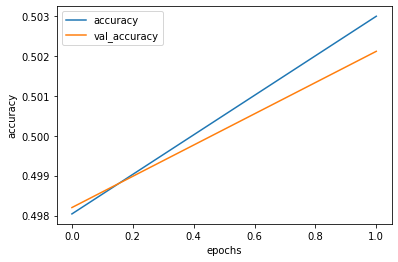

In [18]:
plot_graphs(history,'accuracy')

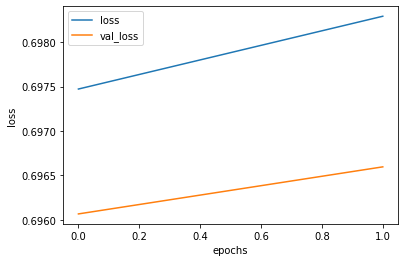

In [19]:
plot_graphs(history,'loss')